# Performance

This notebook reproduces the charts on performance of the datalab, assesing different types of data access from different locations.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
up = pd.read_csv("unweighted-pangeo.csv")
wp = pd.read_csv("weighted-pangeo.csv")
ue = pd.read_csv("unweighted-esgfva.csv")
we = pd.read_csv("weighted-esgfva.csv")
df = pd.concat([up, wp, ue, we]).reset_index(drop=True)

df["throughput"] = df["bytes_recv"] / df["time"] / 2**20 # MB/s
df["hours"] = df["time"] / 3600

df["from"] = df["name"].str.split("-").str[-1]
df

,name,run,time,bytes_recv,bytes_sent,packets_recv,packets_sent,errin,errout,dropin,dropout,workers,throughput,hours,from
0,unweighted-pangeo,0,9497.232118,289655882317,1406571228,33714632,19699960,0,0,0,0,2,29.086093,2.638120,pangeo
1,unweighted-pangeo,1,9280.900523,289653313581,1414336420,33664583,19762227,0,0,0,0,2,29.763806,2.578028,pangeo
2,unweighted-pangeo,2,8921.282631,289694279797,1415696541,34306838,19868246,0,0,0,0,2,30.967968,2.478134,pangeo
3,unweighted-pangeo,3,8836.974324,289760220471,1424983210,35316384,20061834,0,0,0,0,2,31.270531,2.454715,pangeo
4,unweighted-pangeo,4,8822.605387,289757574599,1437562325,35246300,20245915,0,0,0,0,2,31.321174,2.450724,pangeo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,weighted-esgfva,0,13888.914273,491704658507,3984900347,82303137,58434567,0,0,0,0,8,33.762618,3.858032,esgfva
58,weighted-esgfva,1,12705.365151,491929731972,4140140598,85624660,60210447,0,0,0,0,8,36.924618,3.529268,esgfva
59,weighted-esgfva,2,12425.406355,498595514022,4301902845,87373898,61399494,0,0,0,0,8,38.268184,3.451502,esgfva
60,weighted-esgfva,3,13211.614115,491757923675,4123105522,82854089,58611747,0,0,0,0,8,35.497321,3.669893,esgfva


How much data was required for the experiment?

In [3]:
print(f"Amount of GB required: {df['bytes_recv'].sum() / 2**30:.2f}")

Amount of GB required: 22749.28


Group and obtain results.

In [4]:
a = df[["name", "time", "hours", "bytes_recv", "throughput", "workers"]].groupby(["name", "workers"]).agg(["mean", "min", "max"])
a

time                                 hours  \
                                   mean           min           max      mean   
name              workers                                                       
unweighted-esgfva 2        29841.548195  28132.957802  32270.465416  8.289319   
                  4        15373.832844  14631.790964  17388.019889  4.270509   
                  8        11112.912892  10717.657674  11751.730274  3.086920   
unweighted-pangeo 2         9071.798997   8822.605387   9497.232118  2.519944   
                  4         6468.594466   6103.322423   7704.082534  1.796832   
                  8         5252.102157   5187.927135   5317.960275  1.458917   
weighted-esgfva   2        31434.338086  26747.781726  38549.832480  8.731761   
                  4        18061.866373  16131.959987  20111.698737  5.017185   
                  8        13484.899156  12425.406355  15193.195884  3.745805   
weighted-pangeo   2        18777.946450  18307.173366  20318.771588  5.216096   
                  4        12859.442485  12718.509913  13251.530682  3.572067   
                  8        12008.983346  11406.750255  13790.552990  3.335829   

                                                  bytes_recv                \
                                min        max          mean           min   
name              workers                                                    
unweighted-esgfva 2        7.814711   8.964018  4.907681e+11  490747388853   
                  4        4.064386   4.830006  4.908787e+11  490868952882   
                  8        2.977127   3.264370  4.917277e+11  491618383137   
unweighted-pangeo 2        2.450724   2.638120  2.897043e+11  289653313581   
                  4        1.695367   2.140023  2.897182e+11  289711841350   
                  8        1.441091   1.477211  2.900252e+11  290013694170   
weighted-esgfva   2        7.429939  10.708287  4.923383e+11  490739881646   
                  4        4.481100   5.586583  4.909891e+11  490887396494   
                  8        3.451502   4.220332  4.931115e+11  491569690807   
weighted-pangeo   2        5.085326   5.644103  2.898445e+11  289833973988   
                  4        3.532919   3.680981  2.898274e+11  289811625151   
                  8        3.168542   3.830709  2.900418e+11  290027408990   

                                        throughput                        
                                    max       mean        min        max  
name              workers                                                 
unweighted-esgfva 2        490809048970  15.717768  14.504656  16.636212  
                  4        490891186648  30.579410  26.923268  31.995421  
                  8        491828769781  42.241668  39.895727  43.763301  
unweighted-pangeo 2        289760220471  30.481914  29.086093  31.321174  
                  4        289725702020  43.058632  35.863614  45.268908  
                  8        290044813701  52.665904  52.009063  53.317690  
weighted-esgfva   2        497121095372  15.203208  12.151211  17.502443  
                  4        491083420656  26.098818  23.277542  29.029612  
                  8        498595514022  35.061697  30.855746  38.268184  
weighted-pangeo   2        289867309884  14.744053  13.603668  15.098739  
                  4        289843857165  21.499058  20.859224  21.730997  
                  8        290060218412  23.148959  20.058875  24.249123

Plot.

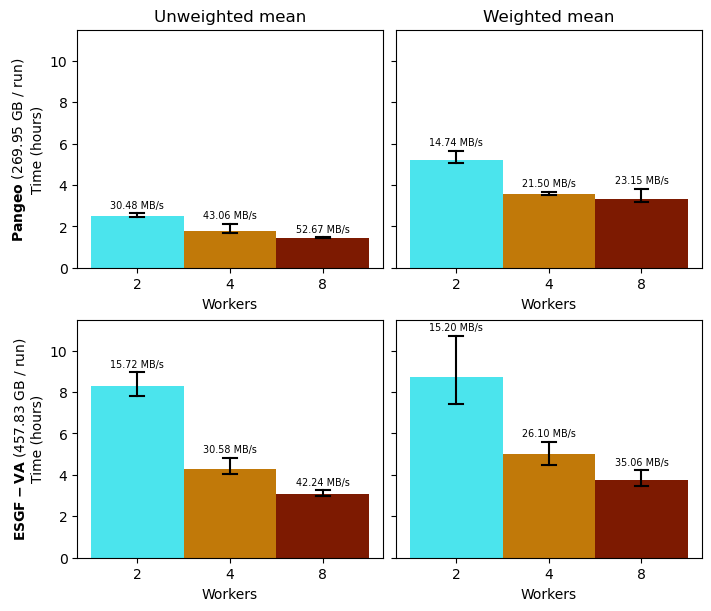

In [5]:
fig, axes = plt.subplots(2, 2, layout='constrained', figsize=(7, 6), sharey=True)
workers = [2, 4, 8]
workers_colors = ["#4BE4ED", "#C17909", "#7D1A01"]

size_pangeo = round(df[df["from"] == "pangeo"]["bytes_recv"].mean() / 2**30, 2)
size_esgfva = round(df[df["from"] == "esgfva"]["bytes_recv"].mean()  / 2**30, 2)

plots = {
    "unweighted-pangeo": (0,0),
    "weighted-pangeo": (0,1),
    "unweighted-esgfva": (1,0),
    "weighted-esgfva": (1,1),
}

bar_width = .075

for x in df["name"].unique():
    p = plots[x]
    axes[p].bar(
        [0,1,2],
        a.loc[x][("hours", "mean")],
        color=workers_colors,
        width=1)

for i in range(2):
    for j in range(2):
        axes[i,j].set_xticks(range(3), labels=[2,4,8])
        axes[i,j].set_xlabel("Workers")
        axes[i,j].set_ylim(0,11.5)

for x in df["name"].unique():
    p = plots[x]
    b = a.loc[(x,)]
    for i,idx in enumerate(b.index):
        axes[p].plot([i,i], [b.loc[idx, ("hours", "min")], b.loc[idx, ("hours", "max")]], c="black")
        axes[p].text(i, b.loc[idx, ("hours", "max")] + .25,
             f"{b.loc[idx, ('throughput', 'mean')]:.2f} MB/s",
             ha="center", size="x-small")

        # Add horizontal bars at the top and bottom
        axes[p].plot([i - bar_width, i + bar_width], 
                     [b.loc[idx, ("hours", "min")], b.loc[idx, ("hours", "min")]], 
                     c="black")  # Bottom bar
        axes[p].plot([i - bar_width, i + bar_width], 
                     [b.loc[idx, ("hours", "max")], b.loc[idx, ("hours", "max")]], 
                     c="black")  # Top bar

axes[0,0].set_title("Unweighted mean")
axes[0,1].set_title("Weighted mean")
axes[0,0].set_ylabel("$\mathbf{Pangeo}$ (" + str(size_pangeo) + " GB / run)\nTime (hours)")
axes[1,0].set_ylabel("$\mathbf{ESGF-VA}$ (" + str(size_esgfva) + " GB / run)\nTime (hours)")

plt.savefig("perf.pdf")